In [28]:
from image_helpers import *
from global_vars import *
import matplotlib.pyplot as plt

In [29]:
data_dir = 'training/'
train_data_filename = data_dir + 'images/'
label_data_filename = data_dir + 'groundtruth/'

# Extract it into numpy arrays.
FILE_REGEX = "satImage_%.3d"

In [30]:
sat_images, label_images = read_images(train_data_filename, label_data_filename, 20, FILE_REGEX)
print("hello")

Loading training/images/satImage_001.png
Loading training/groundtruth/satImage_001.png
Loading training/images/satImage_002.png
Loading training/groundtruth/satImage_002.png
Loading training/images/satImage_003.png
Loading training/groundtruth/satImage_003.png
Loading training/images/satImage_004.png
Loading training/groundtruth/satImage_004.png
Loading training/images/satImage_005.png
Loading training/groundtruth/satImage_005.png
Loading training/images/satImage_006.png
Loading training/groundtruth/satImage_006.png
Loading training/images/satImage_007.png
Loading training/groundtruth/satImage_007.png
Loading training/images/satImage_008.png
Loading training/groundtruth/satImage_008.png
Loading training/images/satImage_009.png
Loading training/groundtruth/satImage_009.png
Loading training/images/satImage_010.png


Loading training/groundtruth/satImage_010.png
Loading training/images/satImage_011.png
Loading training/groundtruth/satImage_011.png
Loading training/images/satImage_012.png
Loading training/groundtruth/satImage_012.png
Loading training/images/satImage_013.png
Loading training/groundtruth/satImage_013.png
Loading training/images/satImage_014.png
Loading training/groundtruth/satImage_014.png
Loading training/images/satImage_015.png
Loading training/groundtruth/satImage_015.png
Loading training/images/satImage_016.png
Loading training/groundtruth/satImage_016.png
Loading training/images/satImage_017.png
Loading training/groundtruth/satImage_017.png
Loading training/images/satImage_018.png
Loading training/groundtruth/satImage_018.png
Loading training/images/satImage_019.png
Loading training/groundtruth/satImage_019.png
Loading training/images/satImage_020.png


Loading training/groundtruth/satImage_020.png
hello


(20, 400, 400)


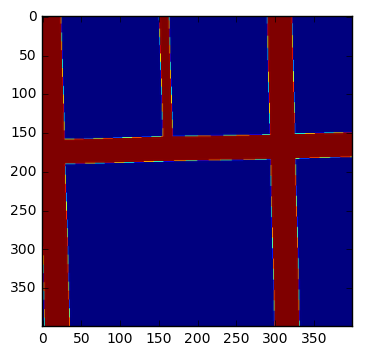

In [31]:
plt.imshow(label_images[2])
print(label_images.shape)
plt.show()

In [32]:
perm_indices = numpy.random.permutation(range(sat_images.shape[0]))
train_limit = int(VALIDATION_TRAIN_PERC * len(perm_indices))
val_limit = int(VALIDATION_VAL_PERC * len(perm_indices))

train_data = sat_images[perm_indices[0:train_limit]]
train_data, means, stds = standardize(train_data)
train_labels = label_images[perm_indices[0:train_limit]]
train_size = train_labels.shape[0]

validation_data = sat_images[perm_indices[train_limit:train_limit + val_limit]]
validation_data, _, _ = standardize(validation_data, means=means, stds=stds)
validation_labels = label_images[perm_indices[train_limit:train_limit + val_limit]]

test_data = sat_images[perm_indices[train_limit + val_limit:]]
test_data, _, _ = standardize(test_data, means=means, stds=stds)
test_labels = label_images[perm_indices[train_limit + val_limit:]]

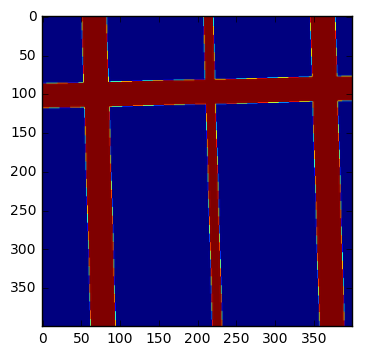

In [33]:
plt.imshow(train_labels[0])
plt.show()

In [34]:
patches_train_data = extract_data(train_data, border=IMG_BORDER)
patches_train_labels = extract_labels(train_labels)

patches_validation_data = extract_data(validation_data, border=IMG_BORDER)
patches_validation_labels = extract_labels(validation_labels)

patches_test_data = extract_data(test_data, border=IMG_BORDER)
patches_test_labels = extract_labels(test_labels)

In [38]:
print(patches_train_data.shape)
print(patches_train_labels.shape)
#plt.imshow(train_labels[0])
#plt.show()

(8750, 24, 24, 3)
(8750, 2)


In [39]:
patches_train_data, patches_train_labels = balance_data(patches_train_data, patches_train_labels)
patches_validation_data, vpatches_alidation_labels = balance_data(patches_validation_data, patches_validation_labels)
patches_test_data, patches_test_labels = balance_data(patches_test_data, patches_test_labels)

4344
(8750, 24, 24, 3)
1168
(2500, 24, 24, 3)
588
(1250, 24, 24, 3)


In [40]:
print(patches_train_data.shape)
print(patches_train_labels.shape)
#plt.imshow(train_labels[0])
#plt.show()

(4344, 24, 24, 3)
(4344, 2)


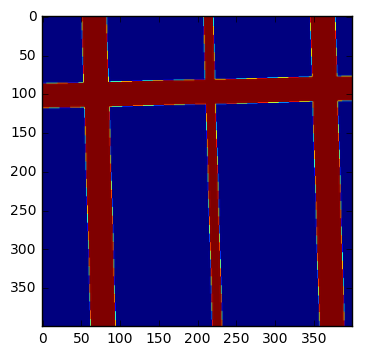

In [41]:
)